In [9]:
import os
import cv2
import random
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_score

In [10]:
Train_dir = r"C:\Users\abdul\Downloads\CIFAR-10-images-master\test"

Test_dir = r"C:\Users\abdul\Downloads\CIFAR-10-images-master\train2"

category = os.listdir(Train_dir)
Train_data = []

for c in category:
    path = os.path.join(Train_dir, c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        img_arr_resize = cv2.resize(img_arr, (32,32))
        Train_data.append((img_arr_resize, category.index(c)))
    
random.shuffle(Train_data)

X = [item[0] for item in Train_data]
Y = [item[1] for item in Train_data]



100%|██████████| 1000/1000 [00:00<00:00, 8469.01it/s]


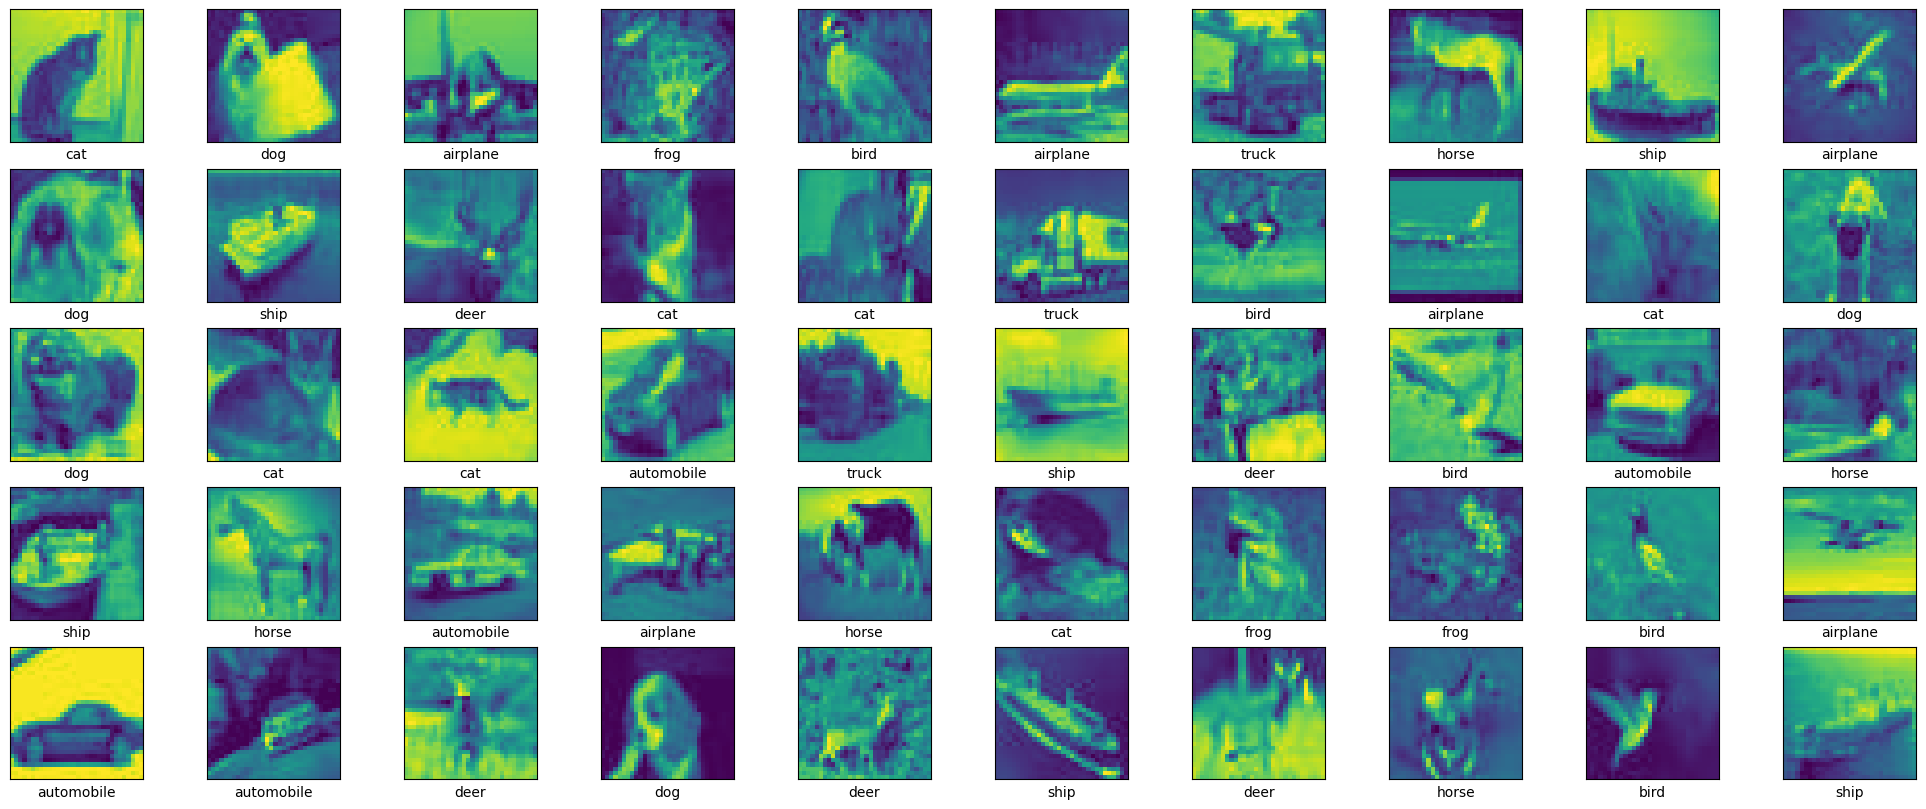

In [11]:
plt.figure(figsize=(25, 10))
for i in range(50):
    plt.subplot(5, 10, i + 1)
    plt.imshow(X[i])  # Display the grayscale image
    plt.xlabel(category[Y[i]] )  # Label based on the category index
    plt.xticks([])
    plt.yticks([])

plt.show()

In [12]:
Test_data = []

for c in category:
    path = os.path.join(Test_dir,c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        img_arr_resize = cv2.resize(img_arr, (32,32))
        Test_data.append((img_arr_resize,category.index(c)))
random.shuffle(Test_data)

100%|██████████| 200/200 [00:00<00:00, 8331.54it/s]


In [13]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data, labels = zip(*Train_data)
data = np.array(data)
labels = np.array(labels)


k_values = [1, 5, 10, 15, 20]


distance_metrics = ['manhattan', 'euclidean']


results = {distance_metric: [] for distance_metric in distance_metrics}


kf = KFold(n_splits=5)

for distance_metric in distance_metrics:
    for k in k_values:
        accuracy_scores = []
        for train_indices, val_indices in kf.split(data):
            train_data = data[train_indices]
            train_labels = labels[train_indices]
            val_data = data[val_indices]
            val_labels = labels[val_indices]

            # Create the k-NN classifier with the current parameters
            classifier = KNeighborsClassifier(n_neighbors=k, metric=distance_metric)
            classifier.fit(train_data.reshape(len(train_data), -1), train_labels)

            # Make predictions on the validation set
            predictions = classifier.predict(val_data.reshape(len(val_data), -1))

            # Calculate accuracy and store it
            accuracy = accuracy_score(val_labels, predictions)
            accuracy_scores.append(accuracy)

        # Calculate and store the mean accuracy across 5 folds
        mean_accuracy = np.mean(accuracy_scores)
        results[distance_metric].append(mean_accuracy)


for distance_metric, accuracy_values in results.items():
    print(f"Distance Metric: {distance_metric.capitalize()}")
    for k, accuracy in zip(k_values, accuracy_values):
        print(f"k = {k}, Mean Accuracy: {accuracy:.4f}")
    print()

Distance Metric: Manhattan
k = 1, Mean Accuracy: 0.2552
k = 5, Mean Accuracy: 0.2565
k = 10, Mean Accuracy: 0.2662
k = 15, Mean Accuracy: 0.2699
k = 20, Mean Accuracy: 0.2668

Distance Metric: Euclidean
k = 1, Mean Accuracy: 0.2354
k = 5, Mean Accuracy: 0.2350
k = 10, Mean Accuracy: 0.2396
k = 15, Mean Accuracy: 0.2392
k = 20, Mean Accuracy: 0.2382



In this test, the Manhattan method was better than the Euclidean method for classifying things. When using Manhattan, we achieved a higher accuracy of 0.2699 when considering 15 neighbors, while with Euclidean, the best accuracy we got was 0.2396 with 10 neighbors. So, for this specific situation, Manhattan with 15 neighbors worked best.

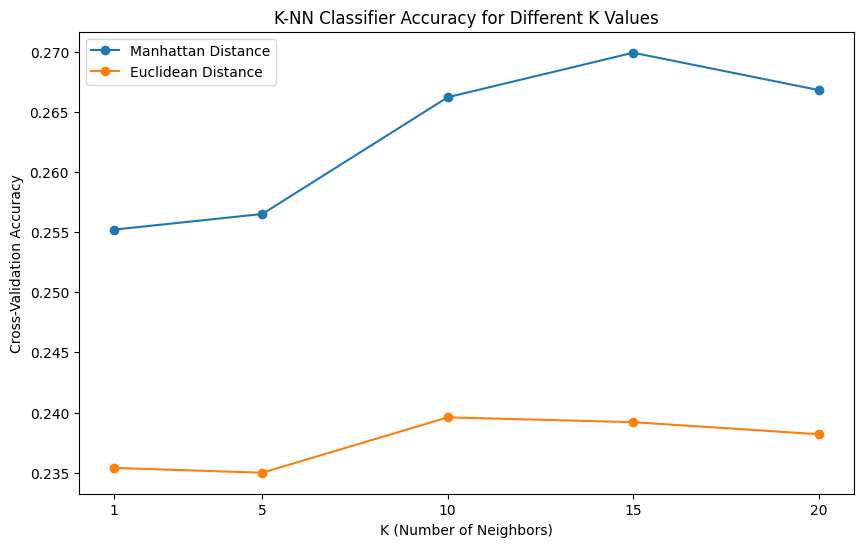

In [14]:
plt.figure(figsize=(10, 6))
for distance_metric, accuracy_values in results.items():
    plt.plot(k_values, accuracy_values, marker='o', label=f'{distance_metric.capitalize()} Distance')

plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('K-NN Classifier Accuracy for Different K Values')
plt.xticks(k_values)
plt.legend()
plt.show()

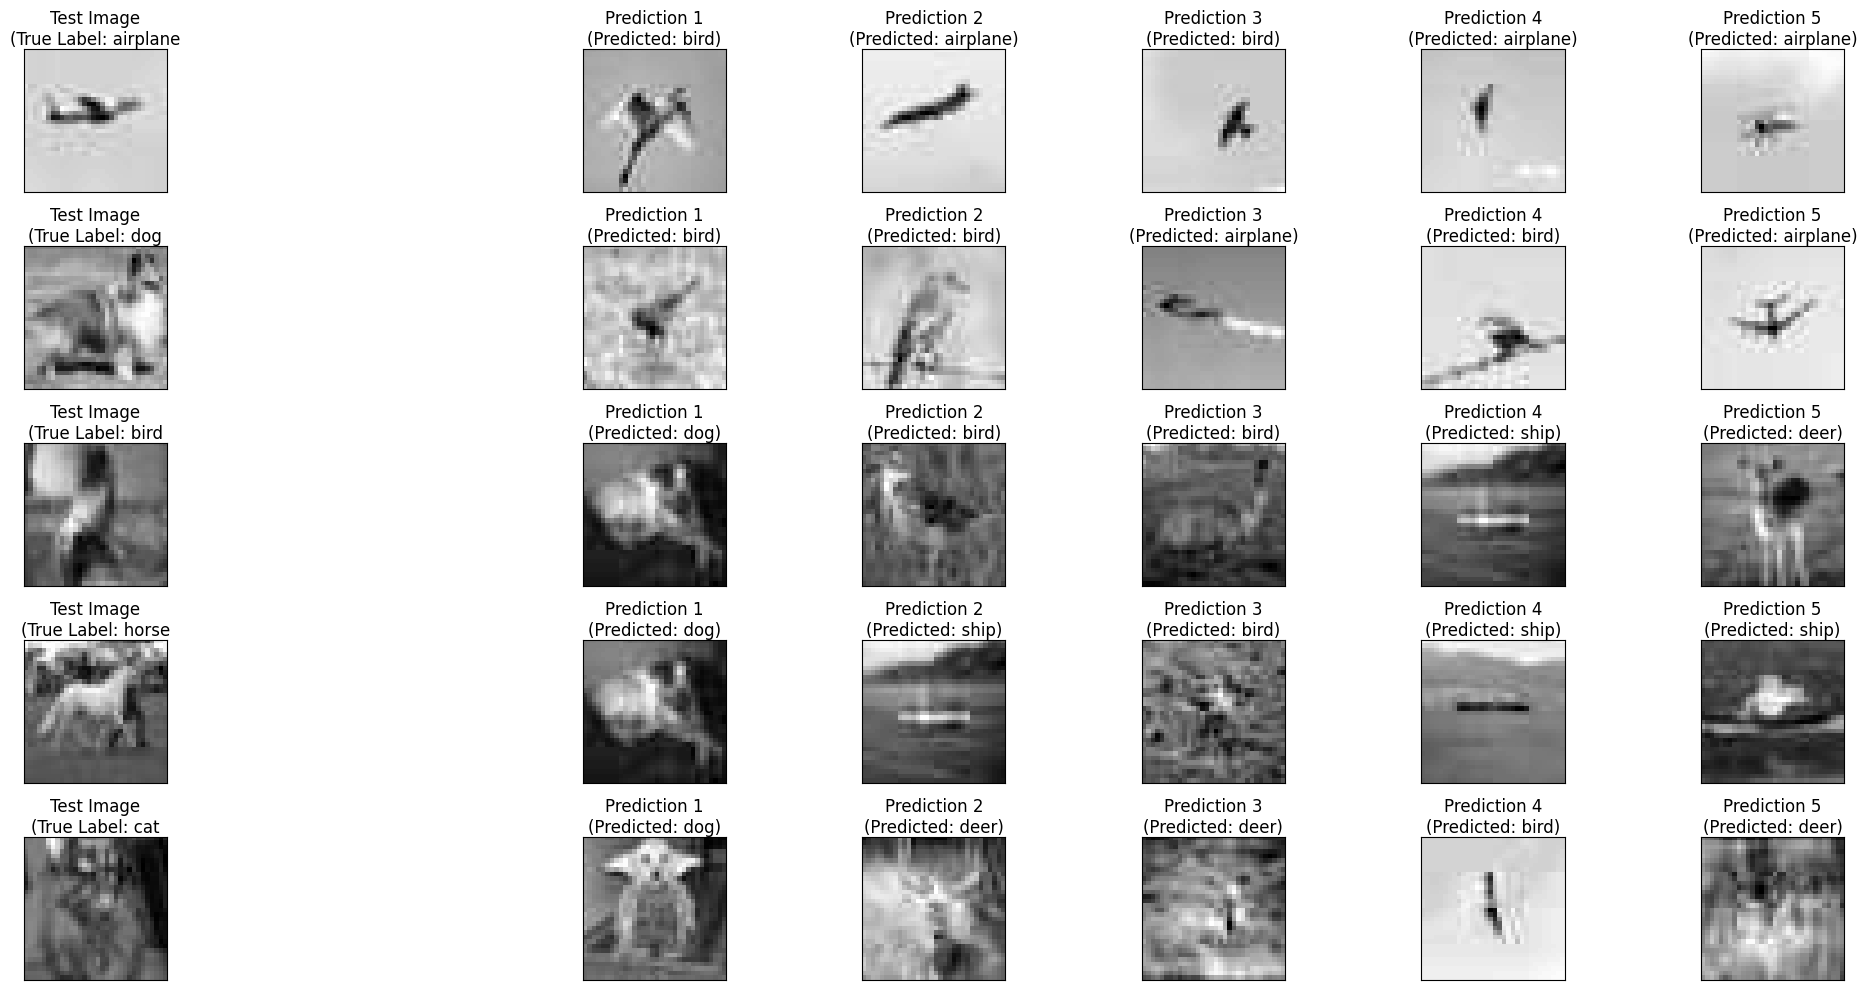

In [15]:
import random


best_k = 5
best_distance_metric = 'manhattan'
knn_model = KNeighborsClassifier(n_neighbors=best_k, metric=best_distance_metric)
X_flat = np.array(X).reshape(len(X), -1)
knn_model.fit(X_flat, Y)


random_test_images = random.sample(Test_data, 5)

plt.figure(figsize=(20, 10))

for i, (test_image, true_label) in enumerate(random_test_images):
    flattened_test_image = test_image.reshape(-1)
    
    plt.subplot(5, 7, i * 7 + 1)
    plt.imshow(test_image, cmap='gray')
    plt.title(f"Test Image\n(True Label: {category[true_label]}", pad=2)  # Minimal distance
    plt.xticks([])
    plt.yticks([])


    distances, indices = knn_model.kneighbors([flattened_test_image], n_neighbors=5)
    
    for j, index in enumerate(indices[0]):
        predicted_label = category[Y[index]]
        plt.subplot(5, 7, i * 7 + j + 3)
        plt.imshow(X[index].reshape(32, 32), cmap="gray")
        plt.title(f"Prediction {j + 1}\n(Predicted: {predicted_label})", pad=2)  # Minimal distance
        plt.xticks([])
        plt.yticks([])

plt.tight_layout()
plt.show()
